In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.fft import rfft, rfft2, rfftfreq
from scipy.signal import butter, filtfilt

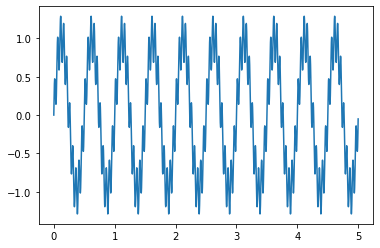

In [7]:
sample_rate = 1000 # Hertz
duration = 5 # Seconds
n = sample_rate * duration

def gen_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    y = np.sin(2 * np.pi * freq * x)
    return x, y

x, signal = gen_sine_wave(2, sample_rate, duration)
_, noise = gen_sine_wave(20, sample_rate, duration)
mixed = signal + noise * 0.3
plt.plot(x, mixed)
plt.show()

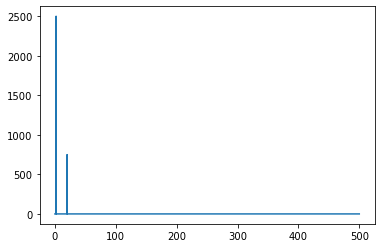

In [14]:
# One dimensional fourier

yf = rfft(mixed)
xf = rfftfreq(n, 1 / sample_rate)
plt.plot(xf, np.abs(yf))

(443, 2)


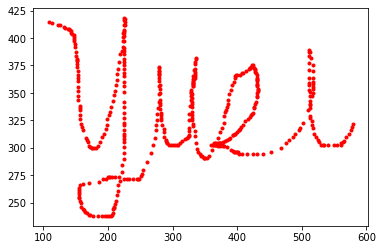

In [22]:
file_path = '/home/spate/PaintApp/yusi_1.csv'
test = np.loadtxt(file_path, delimiter=',')
print(test.shape)
plt.plot(test[:,0], test[:,1], 'r.')
plt.show()

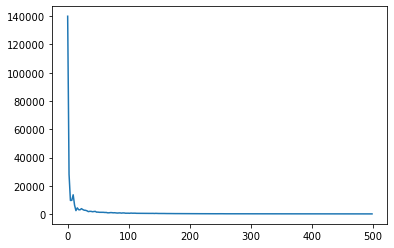

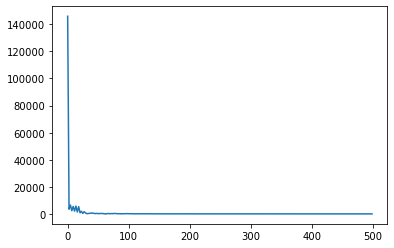

In [35]:
sampling_rate = 50
n = test.shape[0]
duration = n / sampling_rate

yf = rfft(test[:,0])
xf = rfftfreq(n, 1 / sample_rate)
plt.plot(xf, np.abs(yf))
plt.show()

yf = rfft(test[:,1])
xf = rfftfreq(n, 1 / sample_rate)
plt.plot(xf, np.abs(yf))
plt.show()

In [36]:
# Filter

sampling_rate = 50
n = test.shape[0]
duration = n / sampling_rate
cutoff = 4 # Hz
nyq = 0.5 * sampling_rate
order = 2


normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
y = filtfilt(b, a, test)


ValueError: The length of the input vector x must be greater than padlen, which is 9.

In [37]:
test.shape

(443, 2)